The aim of this notebook is twofold:
* being an example of how to load a file from a bucket and how to write something out on google cloud
* reproduce some plots needed for the NeurIPS final abstract

# Loading a model object 

In [9]:
! export BUCKET_NAME='fdl-sdo-data'
! export PATH_DATA='/home/jupyter/data/'
! export RESULTS='EXPERIMENT_RESULTS/VIRTUAL_TELESCOPE/v_experiment_12.tar'

The follwing does not work, I don't know why. The same expression without using env variables works

In [12]:
! gsutil cp gs://${BUCKET_NAME}/${RESULTS} ${PATH_DATA}

CommandException: "cp" command does not support provider-only URLs.


The command below works but it is painfully slow. Saving all together in massive tar folder was not a great idea ...

In [15]:
! gsutil cp gs://fdl-sdo-data/EXPERIMENT_RESULTS/VIRTUAL_TELESCOPE/mark_linear_l1loss.tar /home/jupyter/data/

Copying gs://fdl-sdo-data/EXPERIMENT_RESULTS/VIRTUAL_TELESCOPE/mark_linear_l1loss.tar...
^C[0 files][ 10.0 GiB/228.3 GiB]   44.4 MiB/s                                   


I ended up mounting the fdl-sdo-data in a local folder and from there I extracted locally only the model file I needed by using

!/usr/bin/gcsfuse --implicit-dirs fdl-sdo-data exp_results

! tar -xf exp_results/EXPERIMENT_RESULTS/VIRTUAL_TELESCOPE/v_experiment_12.tar v_experiment_12/0300_v_experiment_12_model.pth

In [16]:
model_path = '/home/jupyter/tmp/v_experiment_12/0300_v_experiment_12_model.pth'

# Loading some predictions and produce a plot

!tar -xvf exp_results/EXPERIMENT_RESULTS/VIRTUAL_TELESCOPE/v_experiment_12.tar v_experiment_12/0300_v_experiment_12_test_predictions.npy

In [1]:
!pwd

/home/jupyter/expanding-sdo-capabilities/notebooks/baselines


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [6]:
file = '/home/jupyter/tmp/v_experiment_12/0300_v_experiment_12_test_predictions.npy'
Y = np.load(file)
shape = Y.shape
Y_test = Y[:,:,0:int(shape[2]/2),:]
Y_pred = Y[:,:,int(shape[2]/2):,:]

In [23]:
# this function has been copied from v_model_viz_final-nips.ipynb
def plot_difference_pred_gt(img_gt, img_pred, channel, img_cmap='hot', img_file=None):
    fig, axs = plt.subplots(1, 3, figsize=(16, 16), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    
    im = axs[0].imshow(img_gt, origin='lower', vmin=0, vmax=2, cmap=img_cmap)
    axs[0].set_title('Real AIA {}'.format(channel))
    axs[0].get_xaxis().set_visible(False)
    axs[0].get_yaxis().set_visible(False)
    
    im = axs[1].imshow((img_pred - img_gt), cmap='seismic', vmin=-1, vmax=1, origin='lower')
    axs[1].set_title('Real - Generated AIA {}'.format(channel))
    axs[1].get_xaxis().set_visible(False)
    axs[1].get_yaxis().set_visible(False)
    divider = make_axes_locatable(axs[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax)
        
    im = axs[2].imshow(img_pred, origin='lower', vmin=0, vmax=2, cmap=img_cmap)
    axs[2].set_title('Generated AIA {}'.format(channel))
    axs[2].get_xaxis().set_visible(False)
    axs[2].get_yaxis().set_visible(False)
    
    if img_file:
        plt.savefig(img_file, bbox_inches='tight')
        plt.close()

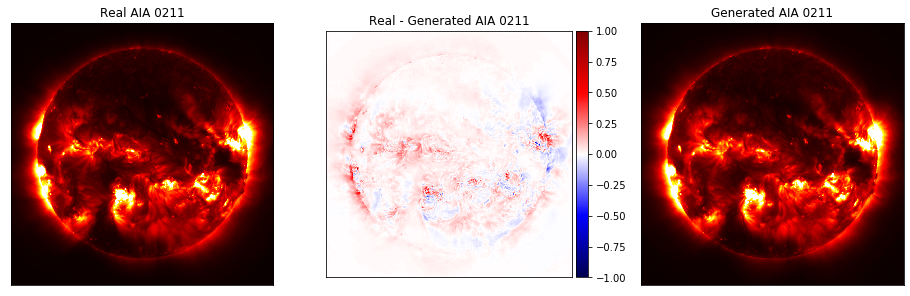

In [29]:
n_sample = 10
img_gt = Y_test[n_sample, 0, :, :]
img_pred = Y_pred[n_sample, 0, :, :]
plot_difference_pred_gt(img_gt, img_pred, '0211')

In [27]:
file_result = '/home/jupyter/plots/v_exp_12_real-predicted_img_hot.png'
n_sample = 10
img_gt = Y_test[n_sample, 0, :, :]
img_pred = Y_pred[n_sample, 0, :, :]
plot_difference_pred_gt(img_gt, img_pred, '0211', img_file=file_result)

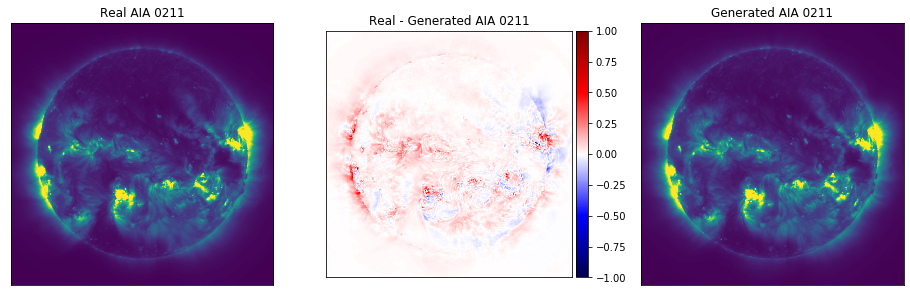

In [30]:
n_sample = 10
img_gt = Y_test[n_sample, 0, :, :]
img_pred = Y_pred[n_sample, 0, :, :]
plot_difference_pred_gt(img_gt, img_pred, '0211', img_cmap='viridis')

In [28]:
file_result = '/home/jupyter/plots/v_exp_12_real-predicted_img_viridis.png'
n_sample = 10
img_gt = Y_test[n_sample, 0, :, :]
img_pred = Y_pred[n_sample, 0, :, :]
plot_difference_pred_gt(img_gt, img_pred, '0211', img_cmap='viridis' ,img_file=file_result)

# Loading the data (mm format)

In [50]:
!gsutil cp gs://fdl-sdo-data/SDOMLmm/2017/01/01/AIA20170101_0006_0094.mm /home/jupyter/tmp/
!gsutil cp gs://fdl-sdo-data/SDOMLmm/2017/01/01/AIA20170101_0006_0211.mm /home/jupyter/tmp/
!gsutil cp gs://fdl-sdo-data/SDOMLmm/2017/01/01/AIA20170101_0006_0171.mm /home/jupyter/tmp/

Copying gs://fdl-sdo-data/SDOMLmm/2017/01/01/AIA20170101_0006_0094.mm...
- [1 files][  1.0 MiB/  1.0 MiB]                                                
Operation completed over 1 objects/1.0 MiB.                                      
Copying gs://fdl-sdo-data/SDOMLmm/2017/01/01/AIA20170101_0006_0211.mm...
- [1 files][  1.0 MiB/  1.0 MiB]                                                
Operation completed over 1 objects/1.0 MiB.                                      
Copying gs://fdl-sdo-data/SDOMLmm/2017/01/01/AIA20170101_0006_0171.mm...
- [1 files][  1.0 MiB/  1.0 MiB]                                                
Operation completed over 1 objects/1.0 MiB.                                      


105.10542
6590.1035
7985.428


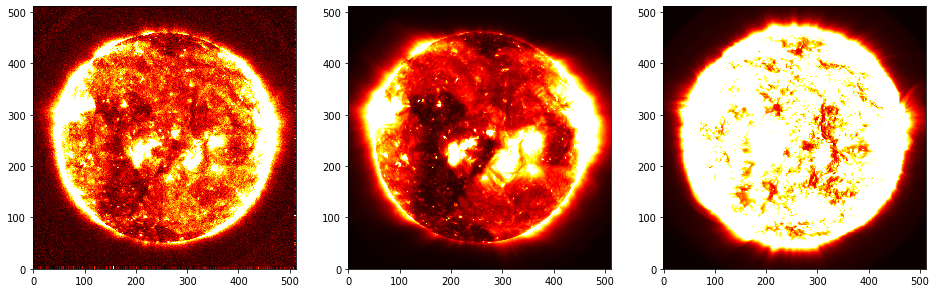

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(16, 16), facecolor='w', edgecolor='k')
axs = axs.ravel()
for i, channel in enumerate(['094', '211', '171']):
    file = '/home/jupyter/tmp/AIA20170101_0006_0{}.mm'.format(channel)
    img = np.memmap(file, shape=(512, 512), mode='r', dtype=np.float32)
    print(img.max())
    im = axs[i].imshow(img, origin='lower', vmax=img.max()/20., cmap='hot')

# Check inventory

In [62]:
import pandas as pd

In [61]:
inventory = '/home/jupyter/tmp/inventory.pkl'

In [64]:
df = pd.read_pickle(inventory)

In [65]:
df.columns

Index(['year', 'month', 'day', 'hour', 'min', 'channel', 'file'], dtype='object')

In [77]:
for year in range(2010, 2018):
    print(year, df.year.isin([year]).sum())

2010 534634
2011 858520
2012 844369
2013 869479
2014 843076
2015 869191
2016 858515
2017 882201


In [79]:
for month in range(1, 13):
    print(month, df.month.isin([month]).sum())

1 597908
2 539874
3 570120
4 567224
5 637133
6 645203
7 660718
8 634502
9 602243
10 652103
11 627790
12 610322


In [82]:
for channel in ['0094', '0211', '0171', '0193' ]:
    print(channel, df.channel.isin([channel]).sum())

0094 711535
0211 712491
0171 711989
0193 712341
